In [110]:
import streamlit as st

In [111]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [112]:
data = pd.read_csv("C:/Users/thoma/Desktop/final project/turnover/turnover.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [114]:
#drop all the features that can generate "etic problem of discrimination" for the final model 
data.drop(columns=['gender','head_gender','age','way','industry'],inplace=True)

In [115]:
#data["gender"] = data["gender"].astype("category")
data["profession"] = data["profession"].astype("category")
data["traffic"] = data["traffic"].astype("category")
data["coach"] = data["coach"].astype("category")
#data["head_gender"] = data["head_gender"].astype("category")
data["greywage"] = data["greywage"].astype("category")
#data["way"] = data["way"].astype("category")
#data["industry"] = data["industry"].astype("category")

In [116]:
from sksurv.preprocessing import OneHotEncoder
data_cat = OneHotEncoder().fit_transform(data)
data_cat.head()

,stag,event,profession=BusinessDevelopment,profession=Commercial,profession=Consult,profession=Engineer,profession=Finanñe,profession=HR,profession=IT,profession=Law,...,traffic=referal,traffic=youjs,coach=no,coach=yes,greywage=white,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,3.0,4.1,8.0,7.1,3.7


In [117]:
X = data_cat

y = X.pop("event")

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123456)

In [119]:
clf = LogisticRegression(penalty='none',max_iter=2000) # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(max_iter=2000, penalty='none')

c:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


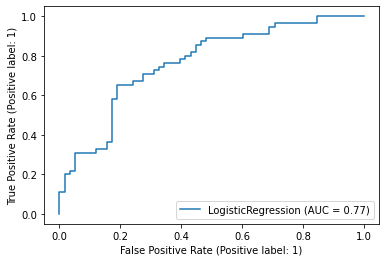

In [120]:
plot_roc_curve(clf, X_test, y_test)

c:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


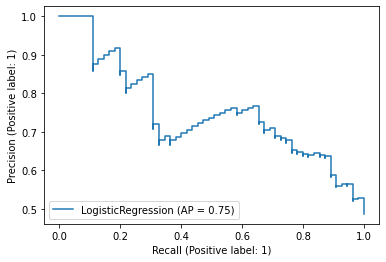

In [121]:
plot_precision_recall_curve(clf, X_test, y_test)

In [122]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [123]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
#print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.59971
AUC = 0.76583
Average Precision = 0.75148
Accuracy = 0.73451
Precision = 0.76596
Recall = 0.65455
F1 score = 0.70588

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        58
           1       0.77      0.65      0.71        55

    accuracy                           0.73       113
   macro avg       0.74      0.73      0.73       113
weighted avg       0.74      0.73      0.73       113



Confusion Matrix


c:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


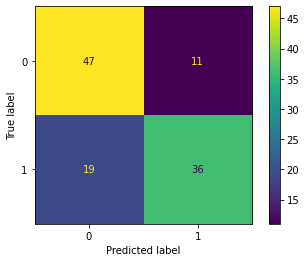

In [124]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[47, 11],
       [19, 36]], dtype=int64)

In [126]:
data_cat.columns

Index(['stag', 'profession=BusinessDevelopment', 'profession=Commercial',
       'profession=Consult', 'profession=Engineer', 'profession=Finanñe',
       'profession=HR', 'profession=IT', 'profession=Law',
       'profession=Marketing', 'profession=PR', 'profession=Sales',
       'profession=Teaching', 'profession=etc', 'profession=manage',
       'traffic=advert', 'traffic=empjs', 'traffic=friends',
       'traffic=rabrecNErab', 'traffic=recNErab', 'traffic=referal',
       'traffic=youjs', 'coach=no', 'coach=yes', 'greywage=white',
       'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

In [127]:
col_name = ['stag', 'profession=BusinessDevelopment', 'profession=Commercial',
       'profession=Consult', 'profession=Engineer', 'profession=Finanñe',
       'profession=HR', 'profession=IT', 'profession=Law',
       'profession=Marketing', 'profession=PR', 'profession=Sales',
       'profession=Teaching', 'profession=etc', 'profession=manage',
       'traffic=advert', 'traffic=empjs', 'traffic=friends',
       'traffic=rabrecNErab', 'traffic=recNErab', 'traffic=referal',
       'traffic=youjs', 'coach=no', 'coach=yes', 'greywage=white',
       'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']

In [128]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + col_name, 'coefficient': coefficients})

,variable,coefficient
0,intercept,1.963918
1,stag,-0.004699
2,profession=BusinessDevelopment,-0.535797
3,profession=Commercial,-0.254060
4,profession=Consult,-0.362035
5,profession=Engineer,0.250491
6,profession=Finanñe,-0.003131
7,profession=HR,-1.004045
8,profession=IT,-1.580742
9,profession=Law,0.008775


Using pipeline to adapt the model to the app

In [91]:
imputer = SimpleImputer(strategy="median")

In [92]:
categoric_features = list(data.select_dtypes(include=["object"]))
numeric_features = list(data.select_dtypes(exclude=["object"]))

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [94]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))
 
categoric_pipe = make_pipeline(
    
    OneHotEncoder()
)

In [95]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, numeric_features),
        ("cat_pipe", categoric_pipe, categoric_features)
    ]
)


In [102]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, selector(dtype_exclude="object")),
        ("cat", categoric_pipe, selector(dtype_include="object")),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(penalty='none',max_iter=2000))]
)


clf.fit(X, y)
print("model score: %.3f" % clf.score(X_test, y_test))
clf

model score: 0.735


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E259E410A0>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E259E410D0>)])),
                ('classifier',
                 LogisticRegression(max_iter=2000, penalty='none'))])

In [130]:
import pickle 
pickle.dump(clf,open('logit1.pkl','wb'))